In [43]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\Users\akhil\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [44]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [45]:
# re-size all the images to this
IMAGE_SIZE = [224,224]
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [46]:
for layer in vgg19.layers:
    layer.trainable = False

folders = glob('Datasets/*')

['Datasets\\ECG Images of Myocardial Infarction Patients (240x12=2880)',
 'Datasets\\ECG Images of Patient that have abnormal heartbeat (233x12=2796)',
 'Datasets\\ECG Images of Patient that have History of MI (172x12=2064)',
 'Datasets\\Normal Person ECG Images (284x12=3408)']

In [47]:
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [48]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [49]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
a = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)
model.compile(
  loss='categorical_crossentropy',
  optimizer=a,
  metrics=['accuracy']
)


train_path = './Datasets'
training_set = image_dataset_from_directory(train_path,
                                                 image_size = (224, 224),
                                                 batch_size = 32,
                                                 label_mode = 'categorical',
                                                 validation_split=0.2,
                                            subset="training",
                                            seed=123)
validation = image_dataset_from_directory(train_path,
                                                 image_size = (224, 224),
                                                 batch_size = 32,
                                                 label_mode = 'categorical',
                                                 validation_split=0.2,
                                            subset="validation",
                                            seed=123)

Found 929 files belonging to 4 classes.
Using 744 files for training.
Found 929 files belonging to 4 classes.
Using 185 files for validation.


In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0, patience=3, mode='max', baseline=None,
                               restore_best_weights=True)
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation),
  callbacks=[early_stopping]
)

Epoch 1/50


<ipython-input-50-afdf2c9e04a2>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


24/24 [==============================] - 146s 6s/step - loss: 4.5234 - accuracy: 0.2876 - val_loss: 3.3541 - val_accuracy: 0.3730
Epoch 2/50
24/24 [==============================] - 212s 9s/step - loss: 1.9826 - accuracy: 0.5215 - val_loss: 2.3288 - val_accuracy: 0.4486
Epoch 3/50
24/24 [==============================] - 176s 7s/step - loss: 1.3216 - accuracy: 0.6290 - val_loss: 1.3157 - val_accuracy: 0.6541
Epoch 4/50
24/24 [==============================] - 174s 7s/step - loss: 0.7542 - accuracy: 0.7648 - val_loss: 0.9961 - val_accuracy: 0.6919
Epoch 5/50
24/24 [==============================] - 201s 8s/step - loss: 0.6335 - accuracy: 0.7836 - val_loss: 1.2247 - val_accuracy: 0.6162
Epoch 6/50
24/24 [==============================] - 183s 8s/step - loss: 0.4537 - accuracy: 0.8414 - val_loss: 0.6824 - val_accuracy: 0.8270
Epoch 7/50
24/24 [==============================] - 171s 7s/step - loss: 0.3034 - accuracy: 0.9005 - val_loss: 0.6279 - val_accuracy: 0.8108
Epoch 8/50
24/24 [======

In [56]:
img=image.load_img('Datasets/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI (4).jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
x.shape
a = model.predict(x)
print(a)
np.argmax(a)

1/1 [==============================] - 0s 166ms/step
[[7.4829406e-01 2.5150433e-01 3.5375126e-07 2.0136440e-04]]


0

In [57]:
model.save('model_VGG19.h5')

In [58]:
class_names = training_set.class_names
class_names

['ECG Images of Myocardial Infarction Patients (240x12=2880)',
 'ECG Images of Patient that have History of MI (172x12=2064)',
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)',
 'Normal Person ECG Images (284x12=3408)']

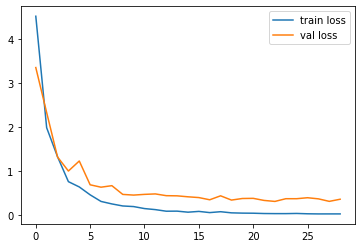

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

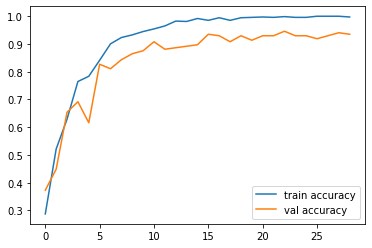

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## ***THE END*** 